In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
np.random.seed(3)
tf.random.set_seed(3)

In [3]:
df = pd.read_csv('data/iris.csv', 
                names = ['sepal_length', 'sepal_width',
                          'petal_length', 'petal_width', 'species'])

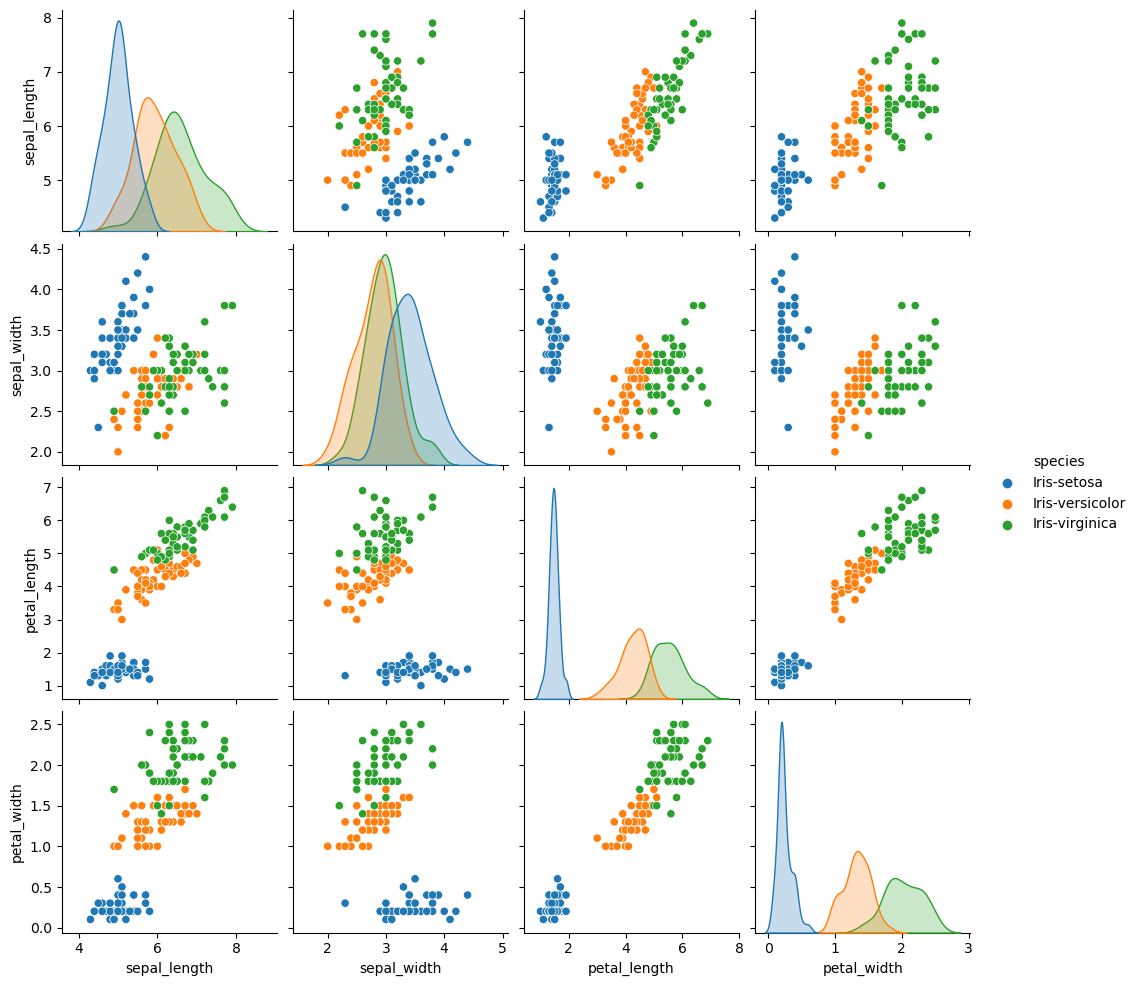

In [4]:
sns.pairplot(df, hue='species')
plt.show()

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [6]:
dataset = df.values

In [7]:
print(type(dataset))

<class 'numpy.ndarray'>


In [8]:
print(dataset.dtype)

object


In [9]:
X = dataset[:, :4].astype(float)
Y_obj = dataset[:, 4]

In [10]:
e = LabelEncoder()
e.fit(Y_obj)
# 비지도 데이터 변환 학습, 비지도 데이터 변환 중 하나 
# 실제 변환은 transform 으로 한다
Y = e.transform(Y_obj)

In [11]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [12]:
Y_encoded = tf.keras.utils.to_categorical(Y)

In [13]:
print(Y_encoded)
# 2자원 배열로 바뀌었다 

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [14]:
model = Sequential()
model.add(Dense(16, input_dim=4, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])
# 손실함수(다중분류)와 옵티마이를 연결해주는 것

In [17]:
model.fit(X,Y_encoded, epochs=50, batch_size=1)

Train on 150 samples
Epoch 1/50
150/150 [==============================] - 1s 5ms/sample - loss: 1.3262 - accuracy: 0.3333
Epoch 2/50
150/150 [==============================] - 0s 993us/sample - loss: 0.8467 - accuracy: 0.5933
Epoch 3/50
150/150 [==============================] - 0s 990us/sample - loss: 0.7125 - accuracy: 0.6800
Epoch 4/50
150/150 [==============================] - 0s 993us/sample - loss: 0.6236 - accuracy: 0.7867
Epoch 5/50
150/150 [==============================] - 0s 1ms/sample - loss: 0.5535 - accuracy: 0.8533
Epoch 6/50
150/150 [==============================] - 0s 1ms/sample - loss: 0.4985 - accuracy: 0.8667
Epoch 7/50
150/150 [==============================] - 0s 994us/sample - loss: 0.4583 - accuracy: 0.9133
Epoch 8/50
150/150 [==============================] - 0s 996us/sample - loss: 0.4272 - accuracy: 0.9400
Epoch 9/50
150/150 [==============================] - 0s 993us/sample - loss: 0.4006 - accuracy: 0.9200
Epoch 10/50
150/150 [============================

In [18]:
print("Accuracy: %.4f" % (model.evaluate(X, Y_encoded)[1]))

150/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================